### 한번 실습했던 패션데이터를 가지고 활성화함수, 최적화 함수를 변화시켜가면서 결과를 확인해 보자!

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist

In [98]:
data = fashion_mnist.load_data()
data

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [99]:
X_train = data[0][0]
y_train = data[0][1]
X_test = data[1][0]
y_test = data[1][1]

In [100]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

#### 정답 데이터를 원핫인코딩

In [101]:
y_train_one_hot = pd.get_dummies(y_train)
y_test_one_hot = pd.get_dummies(y_test)

In [102]:
y_train_one_hot

,0,1,2,3,4,5,6,7,8,9
0,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,1,0,0,0,0
59996,0,1,0,0,0,0,0,0,0,0
59997,0,0,0,1,0,0,0,0,0,0
59998,1,0,0,0,0,0,0,0,0,0


###  활성화 함수, 최적화 함수 별 비교
    - 1. 중간층 활성화 함수 : sigmoid, 최적화 함수 : SGD
    - 2. 중간층 활성화 함수 : relu, 최적화 함수 :SGD
    - 3. 중간층 활성화 함수 : relu, 최적화 함수 : Adam
- 각각의 신경망을 설계하고 결과를 비교해보자!

In [103]:
# 최적화 함수 하이퍼 파라미터 변경을 위한 임포트 (이렇게 임포트해서 쓰게되면 디폴트 값이 아닌 세세한 파라미터 조정이 가능해짐!)
from tensorflow.keras.optimizers import SGD, Adam

#### 신경망 설계(1.중간층 활성화 함수 : sigmoid, 최적화 함수 : SGD)

In [104]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
# Flatten : 데이터를 1차원으로 자동적으로 펴주는 역할을 하는 모듈


In [105]:
model = Sequential()

#Flatten 명령을 통해서 한번에 바로 이미지 데이터를 1차원으로 펴줌
model.add(Flatten(input_shape=(28,28)))

# 중간층
model.add(Dense(450, activation="sigmoid")) # 하나의 층
model.add(Dense(200, activation="sigmoid")) # 하나의 층
model.add(Dense(100, activation="sigmoid")) # 하나의 층
model.add(Dense(50, activation="sigmoid")) # 하나의 층

model.add(Dense(10, activation="softmax")) 
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_35 (Dense)             (None, 450)               353250    
_________________________________________________________________
dense_36 (Dense)             (None, 200)               90200     
_________________________________________________________________
dense_37 (Dense)             (None, 100)               20100     
_________________________________________________________________
dense_38 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_39 (Dense)             (None, 10)                510       
Total params: 469,110
Trainable params: 469,110
Non-trainable params: 0
________________________________________________

In [106]:
# 2. 학습 / 평가 방법 설정
# binary_crossentropy : 2진분류에 사용하는 손실함수(비용함수)
# categorical_crossentropy : 다중분류에 사용하는 손실함수
# -> 오차의 평균을 구하는것은 mse와 같지만 0~1사이 값으로 변환 후 평균오차를 구함
# 
model.compile(loss="categorical_crossentropy",  
              optimizer = "SGD",   # 최적화 함수 : 확률적경사하강법 사용  // SGD도 이외에도 Adam도 있음 
              metrics=["acc"]       # metrics : 평가방법을 설정 (정확도 체크)
                                    # 분류 문제이기 때문에 정확도를 확인
             )

# 회귀는 오차만 확인하면 되지만 분류는 정확도까지 확인해줘야 함!!!!!

In [107]:
X_train.shape

(60000, 28, 28)

In [108]:
y_train.shape

(60000,)

In [109]:
h1 = model.fit(X_train,y_train_one_hot,
               validation_split=0.3,
              epochs=50,  # epochs : 학습 횟수를 설정
              batch_size=32) # 한번에 데이터를 학습시키는 최소 단위 // 높을 수록 러프하게 학습되고 낮을수고 자세히 학습
# verbose : 학습 결과의 출력 형태를 설정하는 명령(0: 출력x, 1:bar형태(디폴트, 2 : ))

Train on 42000 samples, validate on 18000 samples
Epoch 1/50
42000/42000 [==============================] - 4s 89us/sample - loss: 2.2847 - acc: 0.1955 - val_loss: 2.2515 - val_acc: 0.3267
Epoch 2/50
42000/42000 [==============================] - 3s 79us/sample - loss: 2.1722 - acc: 0.3666 - val_loss: 2.0192 - val_acc: 0.2909
Epoch 3/50
42000/42000 [==============================] - 4s 84us/sample - loss: 1.7761 - acc: 0.4105 - val_loss: 1.5814 - val_acc: 0.4677
Epoch 4/50
42000/42000 [==============================] - 3s 78us/sample - loss: 1.4670 - acc: 0.4801 - val_loss: 1.3599 - val_acc: 0.5299
Epoch 5/50
42000/42000 [==============================] - 4s 91us/sample - loss: 1.2709 - acc: 0.5453 - val_loss: 1.1789 - val_acc: 0.5593
Epoch 6/50
42000/42000 [==============================] - 3s 81us/sample - loss: 1.1078 - acc: 0.5890 - val_loss: 1.0384 - val_acc: 0.6228
Epoch 7/50
42000/42000 [==============================] - 3s 72us/sample - loss: 0.9862 - acc: 0.6350 - val_loss: 0.

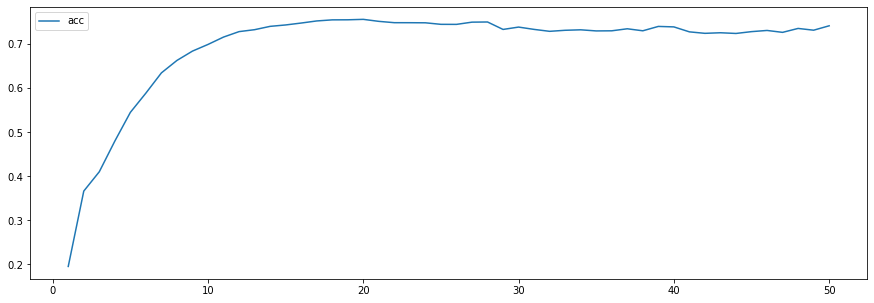

In [110]:
plt.figure(figsize=(15,5))

plt.plot(range(1,51),
        h1.history['acc'],
        label = 'acc'
        )

plt.legend()
plt.show()

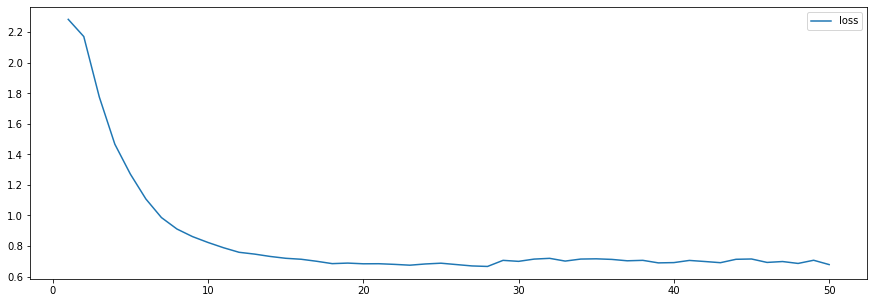

In [111]:
plt.figure(figsize=(15,5))

plt.plot(range(1,51),
        h1.history['loss'],
        label = 'loss'
        )
plt.legend()
plt.show()

In [112]:
model.evaluate(X_test , y_test_one_hot)

10000/10000 [==============================] - 0s 41us/sample - loss: 0.7349 - acc: 0.7126


[0.7349182078361511, 0.7126]

#### 신경망 설계(2.중간층 활성화 함수 : relu, 최적화 함수 : SGD)

In [113]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
# Flatten : 데이터를 1차원으로 자동적으로 펴주는 역할을 하는 모듈


In [114]:
model1 = Sequential()

#Flatten 명령을 통해서 한번에 바로 이미지 데이터를 1차원으로 펴줌
model1.add(Flatten(input_shape=(28,28)))

# 중간층
model1.add(Dense(450, activation="relu")) # 하나의 층
model1.add(Dense(200, activation="relu")) # 하나의 층
model1.add(Dense(100, activation="relu")) # 하나의 층
model1.add(Dense(50, activation="relu")) # 하나의 층

model1.add(Dense(10, activation="softmax")) 
model1.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_8 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_40 (Dense)             (None, 450)               353250    
_________________________________________________________________
dense_41 (Dense)             (None, 200)               90200     
_________________________________________________________________
dense_42 (Dense)             (None, 100)               20100     
_________________________________________________________________
dense_43 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_44 (Dense)             (None, 10)                510       
Total params: 469,110
Trainable params: 469,110
Non-trainable params: 0
________________________________________________

In [115]:
# 2. 학습 / 평가 방법 설정
# binary_crossentropy : 2진분류에 사용하는 손실함수(비용함수)
# categorical_crossentropy : 다중분류에 사용하는 손실함수
# -> 오차의 평균을 구하는것은 mse와 같지만 0~1사이 값으로 변환 후 평균오차를 구함
# 
model1.compile(loss="categorical_crossentropy",  
              optimizer = SGD(lr=0.001),#Ir : learning rate : 학습률(디폴트는 0.01)   # 최적화 함수 : 확률적경사하강법 사용  // SGD도 이외에도 Adam도 있음 
              metrics=["acc"]       # metrics : 평가방법을 설정 (정확도 체크)
                                    # 분류 문제이기 때문에 정확도를 확인
             )

# 회귀는 오차만 확인하면 되지만 분류는 정확도까지 확인해줘야 함!!!!!

In [116]:
X_train.shape

(60000, 28, 28)

In [117]:
y_train.shape

(60000,)

In [118]:
h2 = model1.fit(X_train,y_train_one_hot,
                  validation_split=0.3,
              epochs=50,  # epochs : 학습 횟수를 설정
              batch_size=32) # 한번에 데이터를 학습시키는 최소 단위 // 높을 수록 러프하게 학습되고 낮을수고 자세히 학습
# verbose : 학습 결과의 출력 형태를 설정하는 명령(0: 출력x, 1:bar형태(디폴트, 2 : ))

Train on 42000 samples, validate on 18000 samples
Epoch 1/50
42000/42000 [==============================] - 4s 89us/sample - loss: 1.5351 - acc: 0.7337 - val_loss: 0.6327 - val_acc: 0.7722
Epoch 2/50
42000/42000 [==============================] - 3s 79us/sample - loss: 0.5231 - acc: 0.8144 - val_loss: 0.5612 - val_acc: 0.8009
Epoch 3/50
42000/42000 [==============================] - 3s 78us/sample - loss: 0.4577 - acc: 0.8353 - val_loss: 0.5215 - val_acc: 0.8186
Epoch 4/50
42000/42000 [==============================] - 3s 73us/sample - loss: 0.4199 - acc: 0.8480 - val_loss: 0.4754 - val_acc: 0.8293
Epoch 5/50
42000/42000 [==============================] - 3s 77us/sample - loss: 0.3942 - acc: 0.8534 - val_loss: 0.4436 - val_acc: 0.8408
Epoch 6/50
42000/42000 [==============================] - 3s 75us/sample - loss: 0.3698 - acc: 0.8645 - val_loss: 0.4220 - val_acc: 0.8528
Epoch 7/50
42000/42000 [==============================] - 3s 79us/sample - loss: 0.3520 - acc: 0.8703 - val_loss: 0.

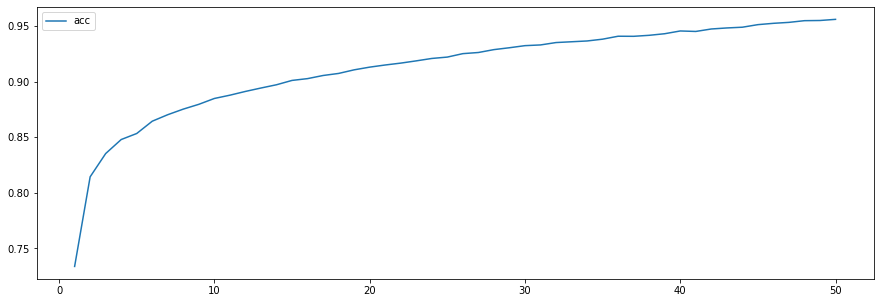

In [119]:
plt.figure(figsize=(15,5))

plt.plot(range(1,51),
        h2.history['acc'],
        label = 'acc'
        )

plt.legend()
plt.show()

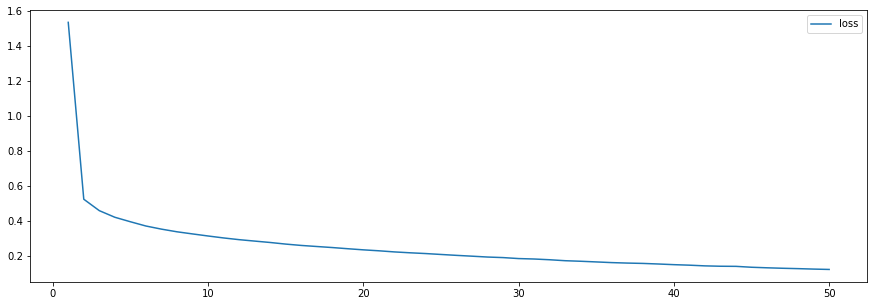

In [120]:
plt.figure(figsize=(15,5))

plt.plot(range(1,51),
        h2.history['loss'],
        label = 'loss'
        )
plt.legend()
plt.show()

In [121]:
model1.evaluate(X_test , y_test_one_hot, batch_size=32)

10000/10000 [==============================] - 1s 50us/sample - loss: 0.5473 - acc: 0.8619


[0.5473372249722481, 0.8619]

#### 신경망 설계(3.중간층 활성화 함수 : relu, 최적화 함수 : Adam)

In [122]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
# Flatten : 데이터를 1차원으로 자동적으로 펴주는 역할을 하는 모듈


In [123]:
model2 = Sequential()

#Flatten 명령을 통해서 한번에 바로 이미지 데이터를 1차원으로 펴줌
model2.add(Flatten(input_shape=(28,28)))

# 중간층
model2.add(Dense(450, activation="relu")) # 하나의 층
model2.add(Dense(200, activation="relu")) # 하나의 층
model2.add(Dense(100, activation="relu")) # 하나의 층
model2.add(Dense(50, activation="relu")) # 하나의 층

model2.add(Dense(10, activation="softmax")) 
model2.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_9 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_45 (Dense)             (None, 450)               353250    
_________________________________________________________________
dense_46 (Dense)             (None, 200)               90200     
_________________________________________________________________
dense_47 (Dense)             (None, 100)               20100     
_________________________________________________________________
dense_48 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_49 (Dense)             (None, 10)                510       
Total params: 469,110
Trainable params: 469,110
Non-trainable params: 0
________________________________________________

In [124]:
# 2. 학습 / 평가 방법 설정
# binary_crossentropy : 2진분류에 사용하는 손실함수(비용함수)
# categorical_crossentropy : 다중분류에 사용하는 손실함수
# -> 오차의 평균을 구하는것은 mse와 같지만 0~1사이 값으로 변환 후 평균오차를 구함
# 
model2.compile(loss="categorical_crossentropy",  
              optimizer = "Adam",   # 최적화 함수 : 확률적경사하강법 사용  // SGD도 이외에도 Adam도 있음 
              metrics=["acc"]       # metrics : 평가방법을 설정 (정확도 체크)
                                    # 분류 문제이기 때문에 정확도를 확인
             )

# 회귀는 오차만 확인하면 되지만 분류는 정확도까지 확인해줘야 함!!!!!

In [125]:
X_train.shape

(60000, 28, 28)

In [126]:
y_train.shape

(60000,)

In [127]:
h3 = model2.fit(X_train,y_train_one_hot,
                  validation_split=0.3,
              epochs=50,  # epochs : 학습 횟수를 설정
              batch_size=32) # 한번에 데이터를 학습시키는 최소 단위 // 높을 수록 러프하게 학습되고 낮을수고 자세히 학습
# verbose : 학습 결과의 출력 형태를 설정하는 명령(0: 출력x, 1:bar형태(디폴트, 2 : ))

Train on 42000 samples, validate on 18000 samples
Epoch 1/50
42000/42000 [==============================] - 4s 96us/sample - loss: 1.2841 - acc: 0.7694 - val_loss: 0.5912 - val_acc: 0.7888
Epoch 2/50
42000/42000 [==============================] - 4s 94us/sample - loss: 0.4742 - acc: 0.8340 - val_loss: 0.4274 - val_acc: 0.8489
Epoch 3/50
42000/42000 [==============================] - 4s 96us/sample - loss: 0.4291 - acc: 0.8470 - val_loss: 0.4232 - val_acc: 0.8522
Epoch 4/50
42000/42000 [==============================] - 4s 90us/sample - loss: 0.4010 - acc: 0.8540 - val_loss: 0.3983 - val_acc: 0.8572
Epoch 5/50
42000/42000 [==============================] - 3s 79us/sample - loss: 0.3788 - acc: 0.8652 - val_loss: 0.3957 - val_acc: 0.8567
Epoch 6/50
42000/42000 [==============================] - 3s 80us/sample - loss: 0.3649 - acc: 0.8681 - val_loss: 0.4067 - val_acc: 0.8571
Epoch 7/50
42000/42000 [==============================] - 3s 77us/sample - loss: 0.3473 - acc: 0.8747 - val_loss: 0.

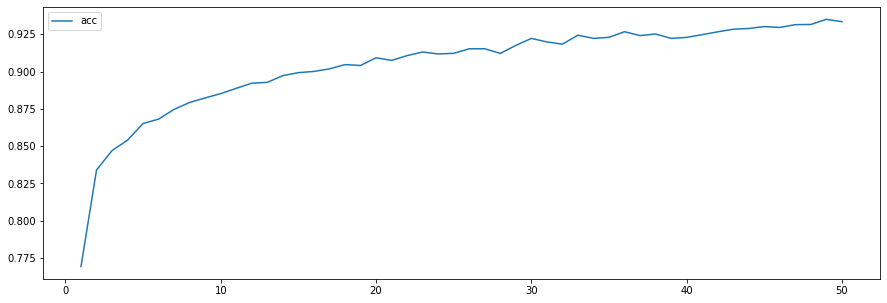

In [128]:
plt.figure(figsize=(15,5))

plt.plot(range(1,51),
        h3.history['acc'],
        label = 'acc'
        )

plt.legend()
plt.show()

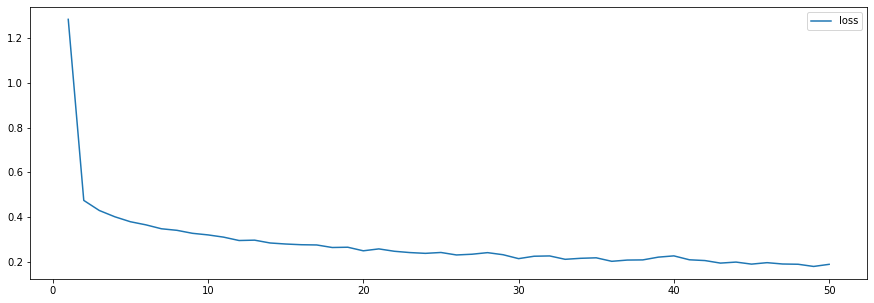

In [129]:
plt.figure(figsize=(15,5))

plt.plot(range(1,51),
        h3.history['loss'],
        label = 'loss'
        )
plt.legend()
plt.show()

In [130]:
model2.evaluate(X_test , y_test_one_hot)

10000/10000 [==============================] - 0s 40us/sample - loss: 0.6744 - acc: 0.8741


[0.674440449810028, 0.8741]

### 3종류 모델 비교

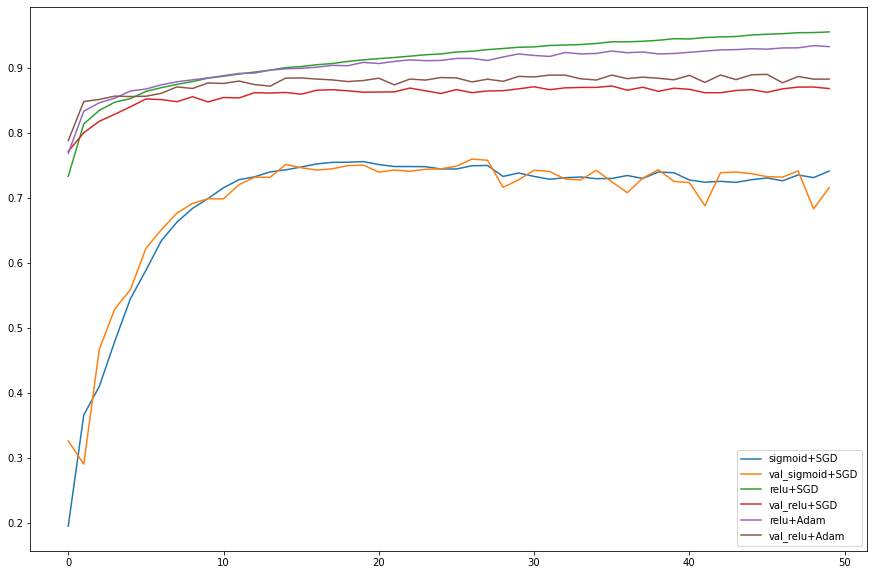

In [133]:
# 3종류 모델 시각화
plt.figure(figsize=(15,10))

# model1
plt.plot(h1.history['acc'], label='sigmoid+SGD')
plt.plot(h1.history['val_acc'], label='val_sigmoid+SGD')

# model2
plt.plot(h2.history['acc'], label='relu+SGD')
plt.plot(h2.history['val_acc'], label='val_relu+SGD')

# model3
plt.plot(h3.history['acc'], label='relu+Adam')
plt.plot(h3.history['val_acc'], label='val_relu+Adam')

plt.legend()
plt.show()

### 최적화 모델 찾기
    - 모델체크포인트 : 모델을 저장
    - 얼리스탑핑 : 조기 학습 중단(과대적합, 시간낭비를 방지)

In [132]:
from tensorflow.keras.callbacks import ModelCheckpointheEarlyStoppingrlyStoppingrlyStoppingrlyStoppingrlyStoppingrlyStoppingrlyStoppingpointCheckpoint, EarlyStopping

In [136]:
# 1. 모델 저장
# 저장 경로 및 파일명 형태를 설정
save_path = './model/FashionModel_{epoch:03d}_{val_acc:.4f}.hdf5'
# epoch는 keras에서 지정해 놓은 키워드
# d : 10진수 형태, 03 -> 0이 3개 붙어있는 형태의 자리수(001, 002, 003 ~) 
# f : 소수점 형태, .4 -> 소수점 4자리 까지 형태의 자리수(0.001,0.002 ~)
# hdf5 : 저장되는 파일의 확장자명

f_mckp = ModelCheckpoint(filepath = save_path,  # 파일 경로 설정
                         monitor = 'val_acc',   # 해당 값을 기준으로 파일을 저장
                         save_best_only = True,# monitor 값이 가장 최고점을 갱신 했을 때 모델을 저장
                         verbose = 1 #모델 개선 및 저장 메시지를 표시
                        )

In [137]:
# 2. 조기 학습 중단
f_early = EarlyStopping(monitor = 'val_acc',
                        # monitor의 값 개선을 몇번이나 기다려줄 것인지 설정
                        patience = 5
                       )

# => 모델 학습시 val_acc가 5번의 epochs를 돌 동안 개선이 되지 않으면 중단시켜주세요!


In [140]:
model3 = Sequential()

#Flatten 명령을 통해서 한번에 바로 이미지 데이터를 1차원으로 펴줌
model3.add(Flatten(input_shape=(28,28)))

# 중간층
model3.add(Dense(450, activation="relu")) # 하나의 층
model3.add(Dense(300, activation="relu")) # 하나의 층
model3.add(Dense(100, activation="relu")) # 하나의 층
model3.add(Dense(50, activation="relu")) # 하나의 층

model3.add(Dense(10, activation="softmax")) 


# 2. 학습 / 평가 방법 설정
# binary_crossentropy : 2진분류에 사용하는 손실함수(비용함수)
# categorical_crossentropy : 다중분류에 사용하는 손실함수
# -> 오차의 평균을 구하는것은 mse와 같지만 0~1사이 값으로 변환 후 평균오차를 구함
# 
model3.compile(loss="categorical_crossentropy",  
              optimizer = "Adam",   # 최적화 함수 : 확률적경사하강법 사용  // SGD도 이외에도 Adam도 있음 
              metrics=["acc"]       # metrics : 평가방법을 설정 (정확도 체크)
                                    # 분류 문제이기 때문에 정확도를 확인
             )

# 회귀는 오차만 확인하면 되지만 분류는 정확도까지 확인해줘야 함!!!!!

h4 = model3.fit(X_train,y_train_one_hot,
                  validation_split=0.3,
              epochs=50,  # epochs : 학습 횟수를 설정
              batch_size=32, callbacks=[f_mckp, f_early]) # 한번에 데이터를 학습시키는 최소 단위 // 높을 수록 러프하게 학습되고 낮을수고 자세히 학습
# verbose : 학습 결과의 출력 형태를 설정하는 명령(0: 출력x, 1:bar형태(디폴트, 2 : ))

Train on 42000 samples, validate on 18000 samples
Epoch 1/50
41760/42000 [============================>.] - ETA: 0s - loss: 1.4393 - acc: 0.7640
Epoch 00001: val_acc improved from -inf to 0.81417, saving model to ./model/FashionModel_001_0.8142.hdf5
42000/42000 [==============================] - 4s 91us/sample - loss: 1.4336 - acc: 0.7643 - val_loss: 0.5592 - val_acc: 0.8142
Epoch 2/50
41888/42000 [============================>.] - ETA: 0s - loss: 0.4887 - acc: 0.8280
Epoch 00002: val_acc improved from 0.81417 to 0.82206, saving model to ./model/FashionModel_002_0.8221.hdf5
42000/42000 [==============================] - 3s 81us/sample - loss: 0.4889 - acc: 0.8280 - val_loss: 0.5410 - val_acc: 0.8221
Epoch 3/50
41536/42000 [============================>.] - ETA: 0s - loss: 0.4504 - acc: 0.8394
Epoch 00003: val_acc improved from 0.82206 to 0.84883, saving model to ./model/FashionModel_003_0.8488.hdf5
42000/42000 [==============================] - 3s 79us/sample - loss: 0.4504 - acc: 0.83

### 저장된 모델 로딩하기

In [141]:
from tensorflow.keras.models import load_model

In [142]:
best_model = load_model("model/FashionModel_022_0.8862.hdf5")

In [143]:
best_model.evaluate(X_test, y_test_one_hot)

10000/10000 [==============================] - 1s 56us/sample - loss: 0.4267 - acc: 0.8800


[0.4267399593770504, 0.88]